In [1]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import mglearn
import matplotlib.pyplot as plt
import sys
import warnings
warnings.filterwarnings('ignore')

# Categorical Variables

In [2]:
import os

data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'adult.data'),
                   header=None, index_col = False,
                   names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                           'marital-status', 'occupation', 'relationship', 'race', 'gender',
                           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                           'income'])

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation','income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
print(data.gender.value_counts())

gender
 Male      21790
 Female    10771
Name: count, dtype: int64


In [4]:
print(data.education.value_counts(),'\n')
print(data.workclass.value_counts(),'\n')
print(data.occupation.value_counts())

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64 

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64 

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech

In [5]:
print('원본 특성:\n',list(data.columns), '\n')
data_dummies = pd.get_dummies(data)
print("pd.get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

pd.get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupatio

In [6]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,50,13,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,38,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,53,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,28,40,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [7]:
data_dummies = data_dummies.astype(float)
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,38.0,40.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,53.0,40.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28.0,40.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values

print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=22)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.80


In [10]:
demo_df = pd.DataFrame({'숫자 특성':[0,1,2,1],
                        '범주형 특성':['양말','여우','양말','상자']})
demo_df

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [11]:
pd.get_dummies(demo_df)

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,False,True,False
1,1,False,False,True
2,2,False,True,False
3,1,True,False,False


In [12]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
pd.get_dummies(demo_df, columns = ['숫자 특성', '범주형 특성'])

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,True,False,False,False,True,False
1,False,True,False,False,False,True
2,False,False,True,False,True,False
3,False,True,False,True,False,False


In [13]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [14]:
print(ohe.get_feature_names_out())

['숫자 특성_0' '숫자 특성_1' '숫자 특성_2' '범주형 특성_상자' '범주형 특성_양말' '범주형 특성_여우']


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([('scaling', StandardScaler(), ['age', 'hours-per-week']),
                       ('onehot', OneHotEncoder(sparse_output=False),
                       ['workclass', 'education', 'gender', 'occupation'])])

In [16]:
data_features = data.drop("income", axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=22)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [17]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수: 0.80


In [18]:
print(ct.named_transformers_.scaling)
print(ct.named_transformers_)

StandardScaler()
{'scaling': StandardScaler(), 'onehot': OneHotEncoder(sparse_output=False)}


In [19]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer((StandardScaler(), ['age', 'hours-per-week']),
                             (OneHotEncoder(sparse_output=False),
                              ['workclass', 'education', 'gender', 'occupation']))

# Binning, Discretization, Linear Models, and Trees

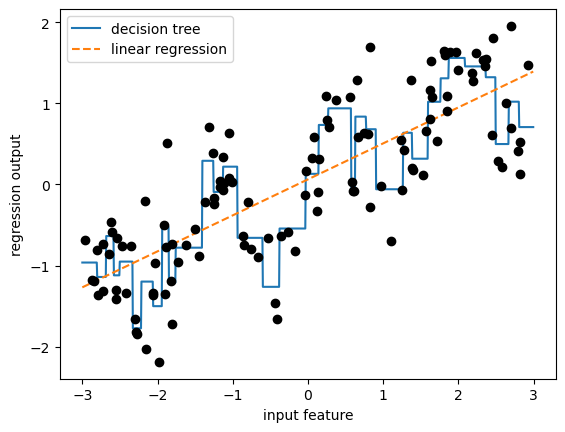

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples = 120)
line = np.linspace(-3,3,1000, endpoint=False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line, reg.predict(line), label='decision tree')

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line),'--', label='linear regression')
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel('regression output')
plt.xlabel('input feature')
plt.legend()
plt.show()

In [21]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print('bin edges: \n', kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


In [22]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [23]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [24]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

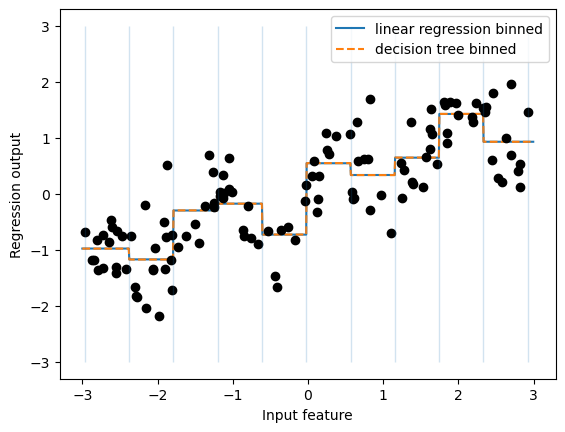

In [25]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned,y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned),'--', label='decision tree binned')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.show()

# Interactions and Polynomials

In [26]:
X_combined = np.hstack([X,X_binned])
print(X_combined.shape)

(120, 11)


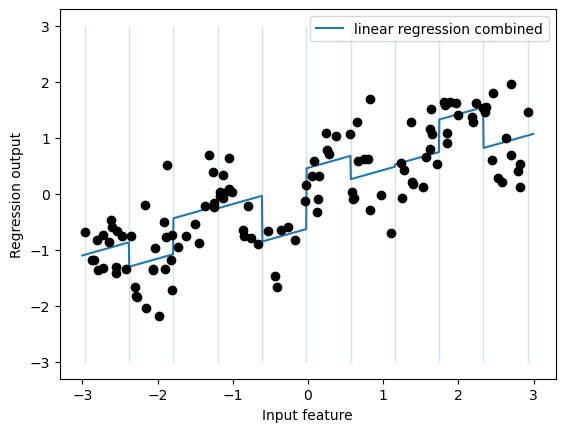

In [27]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label ='linear regression combined')

plt.vlines(kb.bin_edges_[0], -3,3,linewidth=1,alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')
plt.show()

In [28]:
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)

(120, 20)


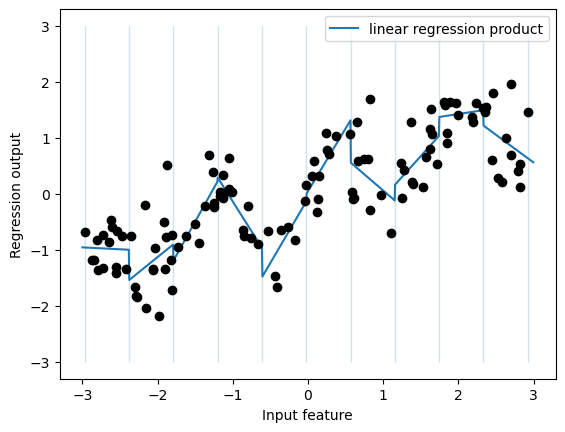

In [29]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

plt.vlines(kb.bin_edges_[0], -3,3,linewidth=1, alpha=.2)
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.show()

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [31]:
print("X_poly.shape:", X_poly.shape)

X_poly.shape: (120, 10)


In [32]:
print("X 원소:\n", X[:5])
print("X_poly 원소:\n", X_poly[:5])

X 원소:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소:
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [33]:
print("항 이름:\n", poly.get_feature_names_out())

항 이름:
 ['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


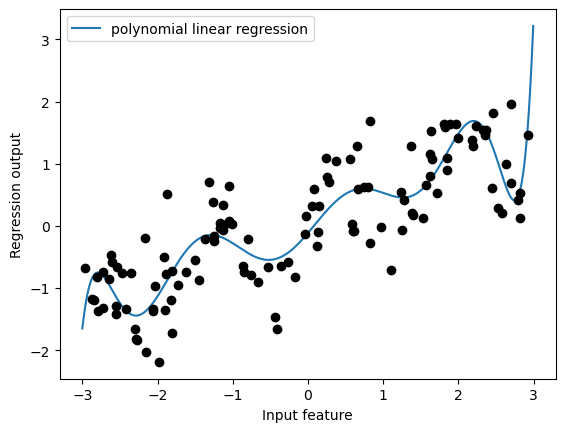

In [34]:
reg = LinearRegression().fit(X_poly,y)

line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')

plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.show()

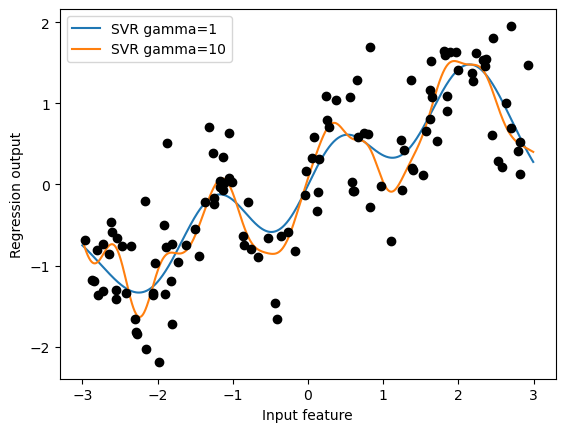

In [35]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma = gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.show()

In [36]:
from sklearn.preprocessing import MinMaxScaler

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=22)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape:", X_train.shape)
print("X_train_poly.shape:", X_train_poly.shape)

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [38]:
print('다항 특성 이름:\n', poly.get_feature_names_out())

다항 특성 이름:
 ['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12'
 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8'
 'x0 x9' 'x0 x10' 'x0 x11' 'x0 x12' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5'
 'x1 x6' 'x1 x7' 'x1 x8' 'x1 x9' 'x1 x10' 'x1 x11' 'x1 x12' 'x2^2' 'x2 x3'
 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7' 'x2 x8' 'x2 x9' 'x2 x10' 'x2 x11'
 'x2 x12' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8' 'x3 x9' 'x3 x10'
 'x3 x11' 'x3 x12' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7' 'x4 x8' 'x4 x9' 'x4 x10'
 'x4 x11' 'x4 x12' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8' 'x5 x9' 'x5 x10'
 'x5 x11' 'x5 x12' 'x6^2' 'x6 x7' 'x6 x8' 'x6 x9' 'x6 x10' 'x6 x11'
 'x6 x12' 'x7^2' 'x7 x8' 'x7 x9' 'x7 x10' 'x7 x11' 'x7 x12' 'x8^2' 'x8 x9'
 'x8 x10' 'x8 x11' 'x8 x12' 'x9^2' 'x9 x10' 'x9 x11' 'x9 x12' 'x10^2'
 'x10 x11' 'x10 x12' 'x11^2' 'x11 x12' 'x12^2']


In [39]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.748
상호작용 특성이 있을 때 점수: 0.829


In [40]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(lasso.score(X_test_poly, y_test)))

상호작용 특성이 있을 때 점수: 0.849


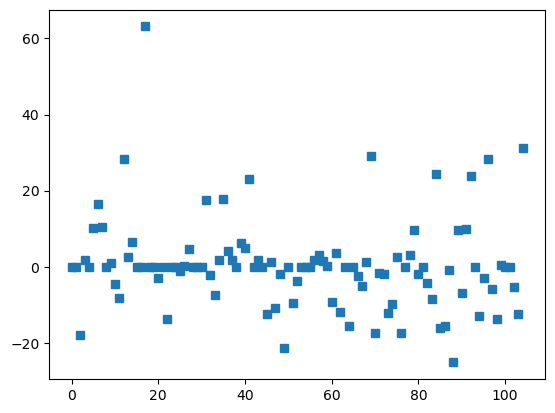

[ 0.00000000e+00 -0.00000000e+00 -1.79964074e+01  1.63954704e+00
  0.00000000e+00  1.02723182e+01  1.66061542e+01  1.04270141e+01
 -3.74359689e-02  8.96381018e-01 -4.62290426e+00 -8.21348279e+00
  2.83418029e+01  2.44646042e+00  6.48380538e+00  0.00000000e+00
 -0.00000000e+00  6.31362407e+01 -0.00000000e+00  0.00000000e+00
 -2.85734224e+00 -0.00000000e+00 -1.38299525e+01 -0.00000000e+00
 -0.00000000e+00 -1.20313478e+00  1.16434924e-01  4.68879688e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.76182524e+01
 -2.26678280e+00 -7.52618510e+00  1.73208659e+00  1.77976395e+01
  4.16416415e+00  1.71837242e+00 -0.00000000e+00  6.29965564e+00
  5.04041673e+00  2.31464594e+01  0.00000000e+00  1.85654569e+00
 -0.00000000e+00 -1.23179561e+01  1.27981148e+00 -1.08459933e+01
 -1.91746059e+00 -2.13600586e+01  0.00000000e+00 -9.49956567e+00
 -3.65728789e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.88930306e+00  3.11618245e+00  1.47999128e+00  9.63404256e-02
 -9.40852967e+00  3.71605

In [41]:
plt.plot(lasso.coef_,'s')
plt.show()
print(lasso.coef_)

In [42]:
lasso_p = [abs(lasso.coef_)> 1.5]
indices = np.where(lasso_p)[1]
X_train_poly_filtered = X_train_poly[:, indices]
X_test_poly_filtered = X_test_poly[:, indices]

In [43]:
lireg = LinearRegression().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(lireg.score(X_test_scaled, y_test)))

lireg = LinearRegression().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(lireg.score(X_test_poly, y_test)))

lireg = LinearRegression().fit(X_train_poly_filtered, y_train)
print("L1 규제로 특성 추출 점수: {:.3f}".format(lireg.score(X_test_poly_filtered, y_test)))

상호작용 특성이 없을 때 점수: 0.754
상호작용 특성이 있을 때 점수: 0.728
L1 규제로 특성 추출 점수: 0.862


In [44]:
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

ridge = Ridge().fit(X_train_poly_filtered, y_train)
print("L1 규제로 특성 추출 점수: {:.3f}".format(ridge.score(X_test_poly_filtered, y_test)))

상호작용 특성이 없을 때 점수: 0.748
상호작용 특성이 있을 때 점수: 0.829
L1 규제로 특성 추출 점수: 0.829


In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=22).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100, random_state=22).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

rf = RandomForestRegressor(n_estimators=100, random_state=22).fit(X_train_poly_filtered, y_train)
print("L1 규제로 특성 추출 점수: {:.3f}".format(rf.score(X_test_poly_filtered, y_test)))

상호작용 특성이 없을 때 점수: 0.832
상호작용 특성이 있을 때 점수: 0.808
L1 규제로 특성 추출 점수: 0.809


In [46]:
svm = SVR().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(svm.score(X_test_scaled, y_test)))

svm = SVR().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(svm.score(X_test_poly, y_test)))

svm = SVR().fit(X_train_poly_filtered, y_train)
print("L1 규제로 특성 추출 점수: {:.3f}".format(svm.score(X_test_poly_filtered, y_test)))

상호작용 특성이 없을 때 점수: 0.627
상호작용 특성이 있을 때 점수: 0.584
L1 규제로 특성 추출 점수: 0.624


# Univariate Nonlinear Transformations

In [47]:
rnd = np.random.RandomState(22)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10,0])

[11  8 29  3 14 29 47  4 24 17]


In [48]:
print("특성 출현 횟수:\n", np.bincount(X[:,0]))

특성 출현 횟수:
 [21 40 66 51 53 59 64 49 49 38 29 38 31 29 27 24 16 17 20 20 17 12  7 16
 15  7  9  7  8 10  9 10  6  5  4  5  9  4  2  2  2  3  5  3  5  2  0  4
  6  6  2  2  2  2  0  0  3  2  4  2  0  2  2  1  1  0  2  0  1  1  0  0
  1  1  1  0  0  0  0  1  1  0  1  0  1  1  1  1  0  1  2  1  0  2  0  0
  1  0  0  0  0  1  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0
  1  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  2  0  0  0
  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1]


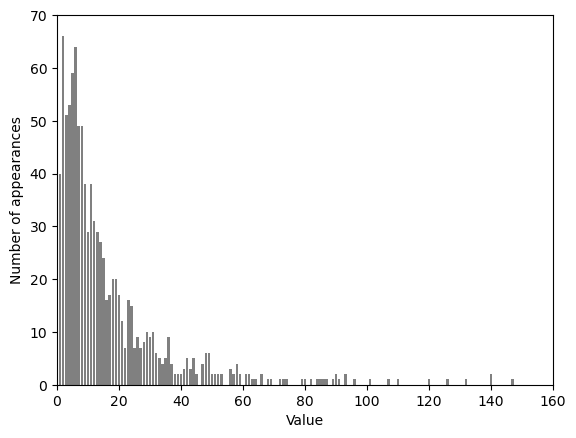

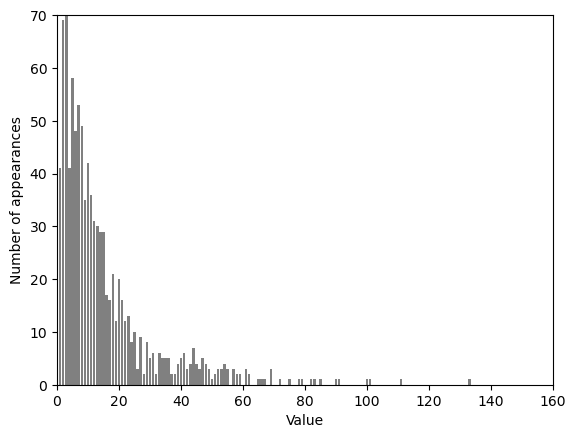

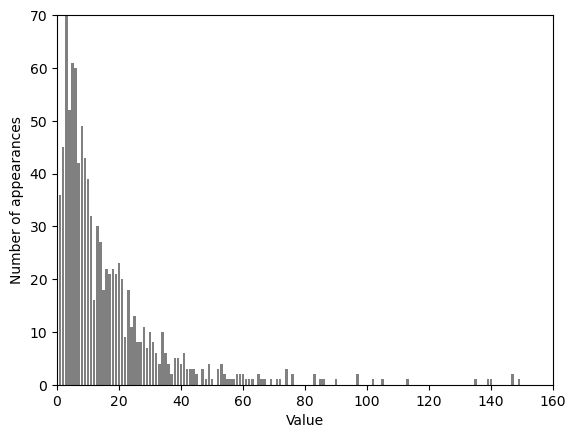

In [49]:
plt.xlim(0,160)
plt.ylim(0, 70)
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.show()

plt.xlim(0,160)
plt.ylim(0, 70)
bins1 = np.bincount(X[:,1])
plt.bar(range(len(bins1)), bins1, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.show()

plt.xlim(0,160)
plt.ylim(0, 70)
bins2 = np.bincount(X[:,2])
plt.bar(range(len(bins2)), bins2, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=22)
score = Ridge().fit(X_train,y_train).score(X_test,y_test)
print("테스트 점수:{:.3f}".format(score))

테스트 점수:0.562


In [51]:
X_train_log = np.log(X_train+1)
X_test_log = np.log(X_test+1)

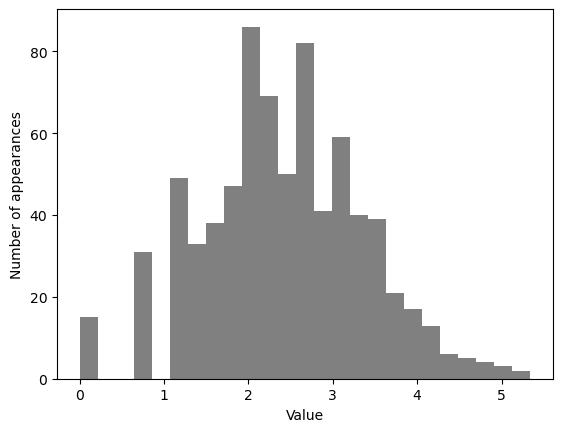

In [52]:
plt.hist(X_train_log[:,0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.show()

In [53]:
score = Ridge().fit(X_train_log,y_train).score(X_test_log,y_test)
print("테스트 점수:{:.3f}".format(score))

테스트 점수:0.839


# Automatic Feature Selection

In [54]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif

cancer = load_breast_cancer()

rng = np.random.RandomState(22)
noise = rng.normal(size=(len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=22, test_size=.5)
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False False False  True False False
 False False False False False  True False False False False False  True
 False False False  True False False False  True  True False False  True
 False False False False False False False False  True  True False False
 False  True  True  True  True False False False]


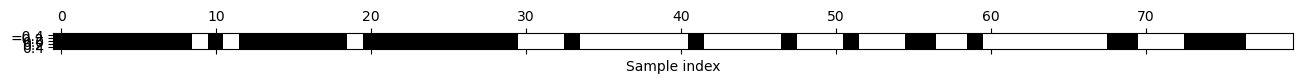

In [55]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("Sample index")
plt.show()

In [56]:
X_test_selected = select.transform(X_test)
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
 lr.score(X_test_selected, y_test)))

Score with all features: 0.923
Score with only selected features: 0.923


In [57]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=22),
                        threshold='median')

In [58]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print('X_train.shape:', X_train.shape)
print('X_train_l1.shape:',X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


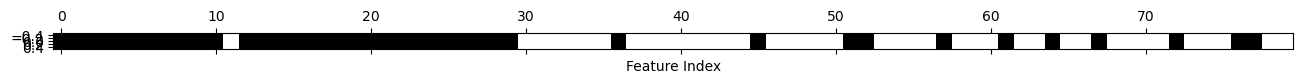

In [59]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Feature Index')
plt.show()

In [60]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1,y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.916


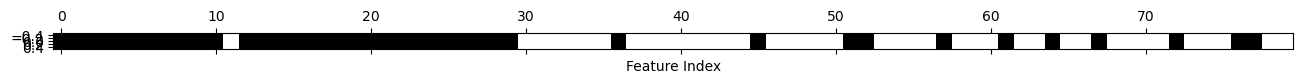

In [61]:
from sklearn.feature_selection import RFE
selet = RFE(RandomForestClassifier(n_estimators=100, random_state=22),
            n_features_to_select=40)
select.fit(X_train, y_train)
mask = select.get_support()

plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Feature Index')
plt.show()

In [62]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print('테스트 점수: {:.3f}'.format(score))

테스트 점수: 0.916


# Utilizing Expert Knowledge

In [63]:
citibike = mglearn.datasets.load_citibike()
print("시티 바이크 데이터:\n", citibike.head())

시티 바이크 데이터:
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


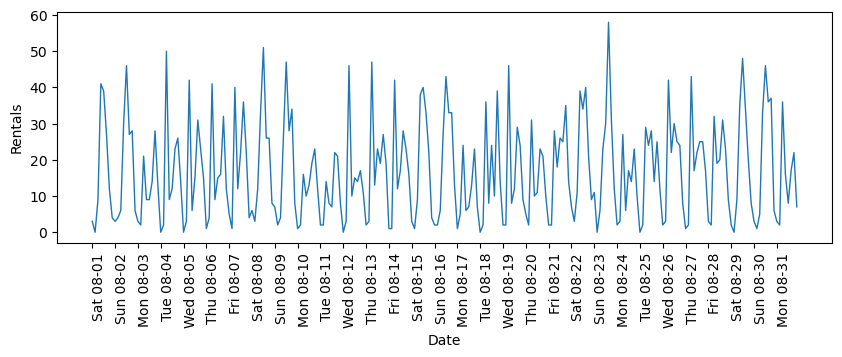

In [64]:
plt.figure(figsize=(10,3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")
plt.show()

In [65]:
y = citibike.values
X = citibike.index.astype('int64').values.reshape(-1,1)

In [66]:
n_train =184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train,y_train)
    print('테스트 세트 R^2: {:.2f}'.format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10,3))
    
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
 ha="left")
    
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    plt.plot(range(n_train, len(y_test) +n_train), y_pred, '--', label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")
    plt.show()

테스트 세트 R^2: -0.10


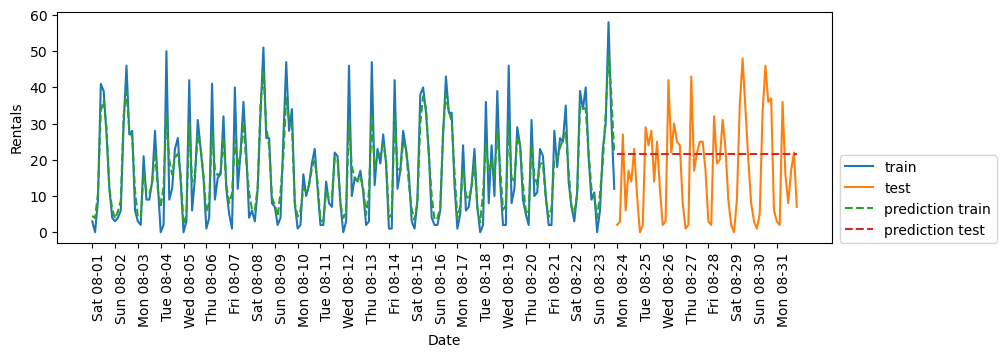

In [67]:
regressor = RandomForestRegressor(n_estimators=100, random_state=22)
eval_on_features(X,y,regressor)

테스트 세트 R^2: 0.60


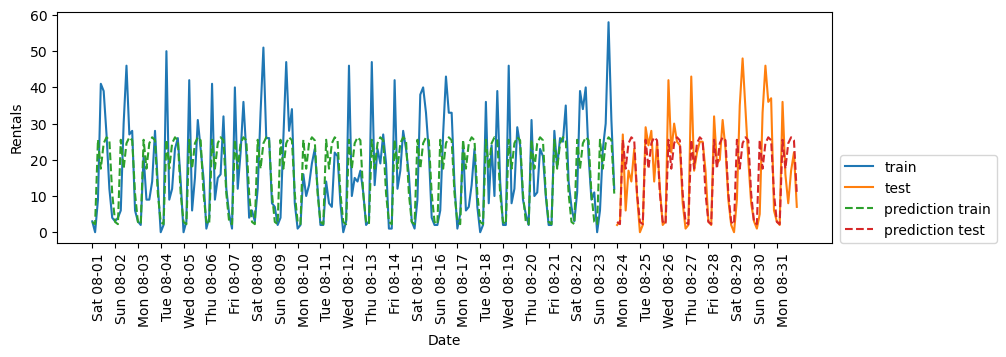

In [68]:
X_hour = citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour, y, regressor)

테스트 세트 R^2: 0.84


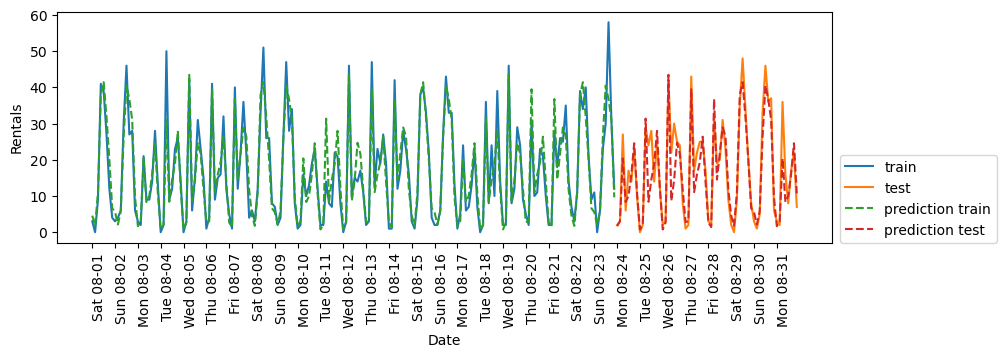

In [69]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1),
                         citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week, y, regressor)

테스트 세트 R^2: 0.13


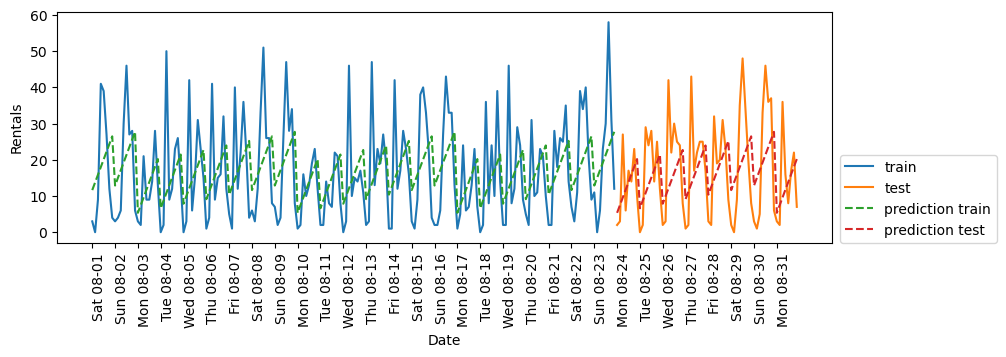

In [70]:
eval_on_features(X_hour_week, y, LinearRegression())

테스트 세트 R^2: 0.62


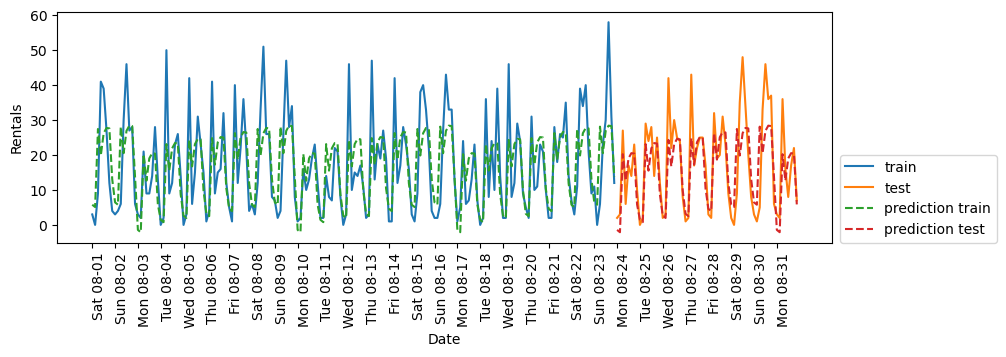

In [71]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_onehot, y, Ridge())

테스트 세트 R^2: 0.85


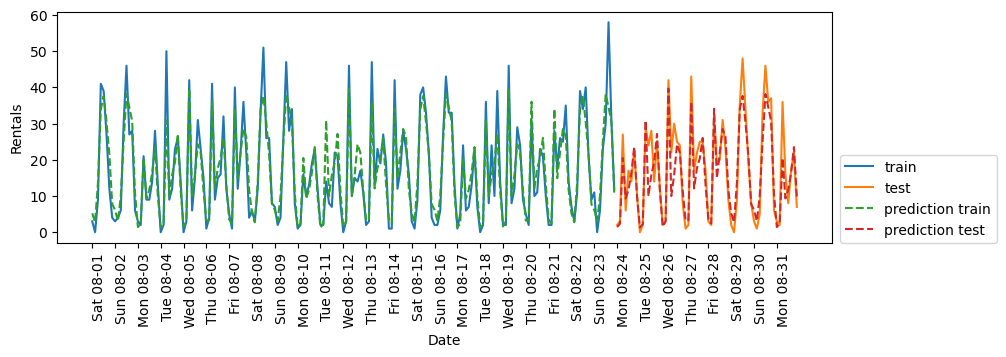

In [72]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias = False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [73]:
hour = ["%02d:00" % i for i in range(0,24,3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

In [74]:
features_poly = poly_transformer.get_feature_names_out(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]


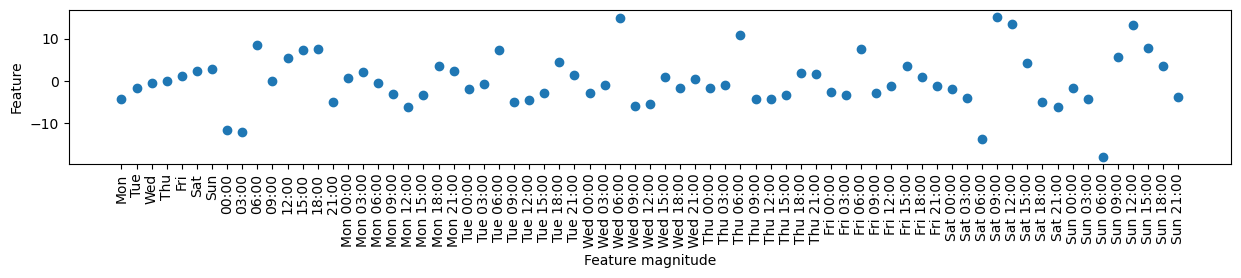

In [75]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature magnitude")
plt.ylabel("Feature")
plt.show()